In [ ]:
import pandas as pd

load the dataset

In [ ]:
ls

drive/  sample_data/


In [ ]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
pwd

'/content/drive/MyDrive'

In [ ]:
cd /content/drive/MyDrive/conversation engine for deaf and dumb.zip

[Errno 20] Not a directory: '/content/drive/MyDrive/conversation engine for deaf and dumb.zip'
/content/drive/MyDrive


In [ ]:
!unzip 'conversation engine for deaf and dumb.zip'

Archive:  conversation engine for deaf and dumb.zip
replace Dataset/test_set/A/1.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
Train_data=ImageDataGenerator(rescale=1./255,horizontal_flip= True,vertical_flip= True,zoom_range=0.2)

In [ ]:
Test_data=ImageDataGenerator(rescale=1./255)

In [ ]:
x_train=Train_data.flow_from_directory(r"/content/drive/MyDrive/Dataset/training_set",target_size=(64,64),
                                       class_mode="categorical",batch_size=300, color_mode='grayscale')

Found 15750 images belonging to 9 classes.


In [ ]:
x_test=Test_data.flow_from_directory(r"/content/drive/MyDrive/Dataset/test_set",target_size=(64,64),
                                       class_mode="categorical",batch_size=300,color_mode='grayscale')

Found 2250 images belonging to 9 classes.


In [ ]:
len(x_train)

53

In [ ]:
len(x_test)

8

In [ ]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [ ]:
x_test.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [ ]:
test_datagen=ImageDataGenerator(rescale=1./255)

Model Building --Sprint 3

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [ ]:
#Creating the model
model=Sequential()

In [ ]:
#Adding the layers
model=Sequential()
model.add(Convolution2D(32,(3,3),input_shape=(64,64,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#adding hidden layers
model.add(Dense(512, activation='relu'))
model.add(Dense(9, activation='relu'))

In [ ]:
#Adding the output layer
model.add(Dense(9, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
len(x_train)

53

In [ ]:
len(x_test)

8

In [ ]:
### model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)
# Fitting the Model Generator
model.fit_generator(x_train,steps_per_epoch=len(x_train),epochs=10,validation_data=x_test,validation_steps=len(x_test))
#model.fit(x_train, epochs=100, verbose=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/10
53/53 [==============================] - 98s 2s/step - loss: 1.5098 - accuracy: 0.4139 - val_loss: 1.2455 - val_accuracy: 0.6098
Epoch 2/10
53/53 [==============================] - 98s 2s/step - loss: 0.9909 - accuracy: 0.6395 - val_loss: 0.7839 - val_accuracy: 0.8364
Epoch 3/10
53/53 [==============================] - 96s 2s/step - loss: 0.6332 - accuracy: 0.8344 - val_loss: 0.6295 - val_accuracy: 0.8342
Epoch 4/10
53/53 [==============================] - 96s 2s/step - loss: 0.4576 - accuracy: 0.8549 - val_loss: 0.5360 - val_accuracy: 0.8333
Epoch 5/10
53/53 [==============================] - 98s 2s/step - loss: 0.2958 - accuracy: 0.8976 - val_loss: 0.3582 - val_accuracy: 0.9498
Epoch 6/10
53/53 [==============================] - 95s 2s/step - loss: 0.1532 - accuracy: 0.9635 - val_loss: 0.3361 - val_accuracy: 0.9724
Epoch 7/10
53/53 [==============================] - 97s 2s/step - loss: 0.1040 - accuracy: 0.9747 - val_loss: 0.3673 - val_accuracy: 0.9649
Epoch 8/10
53/53 [==

In [ ]:
model.save('zxcvb.h5')

Test the model

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

In [ ]:
model = load_model('/content/drive/MyDrive/zxcvb.h5')

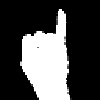

In [ ]:
img = image.load_img('/content/drive/MyDrive/Dataset/test_set/I/101.png',target_size = (100,100))
img

In [ ]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

In [ ]:
img=image.load_img("/content/drive/MyDrive/Dataset/test_set/I/107.png")
detect(img)

1/1 [==============================] - 0s 145ms/step
THE PREDICTED LETTER IS  I


In [ ]:
img=image.load_img("/content/drive/MyDrive/Dataset/test_set/C/107.png")
detect(img)

1/1 [==============================] - 0s 34ms/step
THE PREDICTED LETTER IS  C


In [ ]:
img=image.load_img("/content/drive/MyDrive/Dataset/test_set/E/107.png")
detect(img)

1/1 [==============================] - 0s 29ms/step
THE PREDICTED LETTER IS  E
